In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.groupby(['Pclass'], as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df.groupby(['Sex'], as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df.groupby(['SibSp'], as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df.groupby(['Parch'], as_index = False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [10]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [13]:
train_df.groupby(['Family_size'], as_index = False)['Survived'].mean()

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [14]:
family_map = {
    1: 'Alone',
    2: 'Small',
    3: 'Small',
    4: 'Small',
    5: 'Medium',
    6: 'Medium',
    7: 'Large',
    8: 'Large', 
    11: 'Large'
}

In [15]:
train_df['Family size group'] = train_df['Family_size'].map(family_map)
test_df['Family size group'] = test_df['Family_size'].map(family_map)

In [16]:
train_df.groupby(['Family size group'], as_index = False)['Survived'].mean()

,Family size group,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [17]:
train_df.groupby(['Embarked'], as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


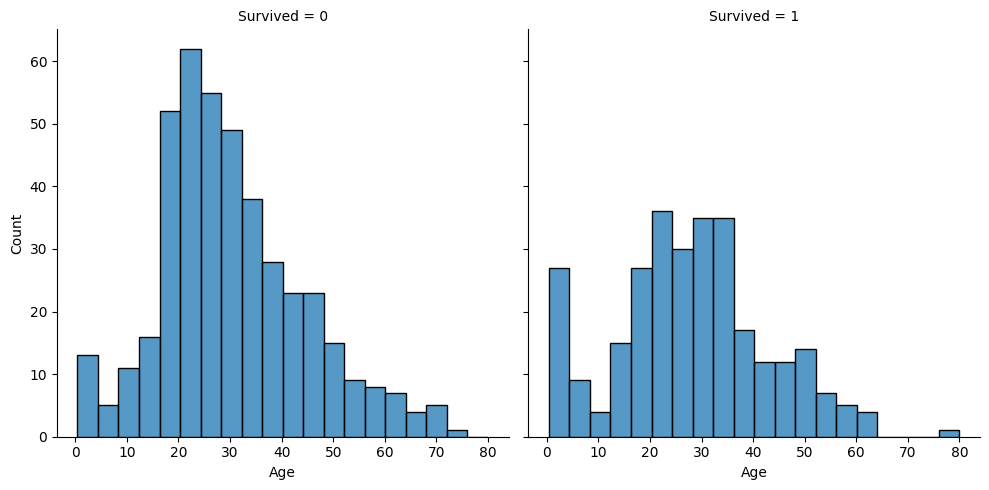

In [18]:
sns.displot(train_df, x = 'Age', col = 'Survived')

In [19]:
train_df['Age Range'] = pd.qcut(train_df['Age'], 8)
test_df['Age Range'] = pd.qcut(test_df['Age'], 8)

In [20]:
train_df.groupby(['Age Range'], as_index = False)['Survived'].mean()

C:\Users\erfan\AppData\Local\Temp\ipykernel_3600\2427888605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age Range'], as_index = False)['Survived'].mean()


,Age Range,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [21]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0 
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1 
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2 
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age'] = 8

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0 
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1 
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2 
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age'] = 8

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family size group,Age Range
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


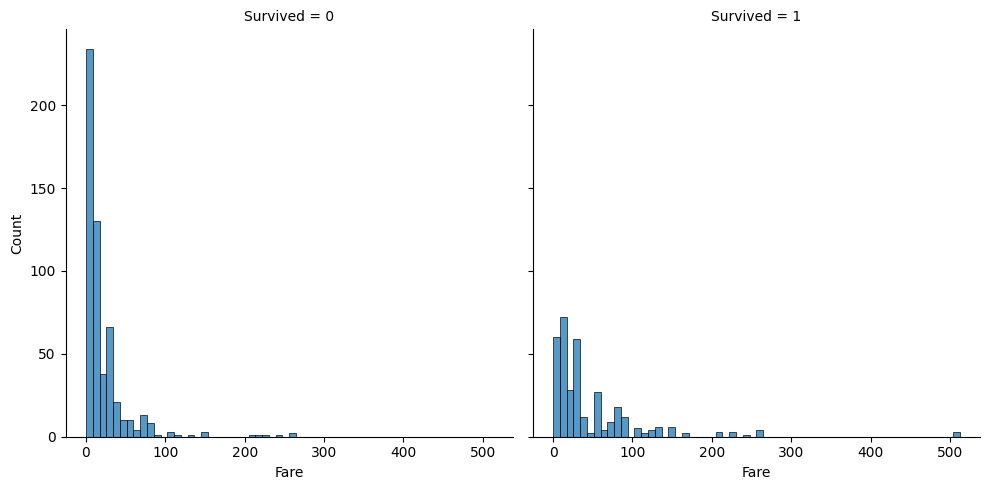

In [23]:
sns.displot(
    train_df,
    x = 'Fare',
    col = 'Survived'
)

In [24]:
train_df['Fare Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare Cut'] = pd.qcut(test_df['Fare'], 6)

In [25]:
train_df.groupby(['Fare Cut'], as_index = False)['Survived'].mean()

C:\Users\erfan\AppData\Local\Temp\ipykernel_3600\1238241757.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare Cut'], as_index = False)['Survived'].mean()


,Fare Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [26]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0 
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1 
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2 
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] = 6

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0 
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1 
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2 
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare'] = 6

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family size group,Age Range,Fare Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [28]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
train_df['Title'] = train_df['Name'].str.split(pat = ',', expand = True)[1].str.split(pat = '.', expand = True)[0].apply(lambda x:x.strip()) 
test_df['Title'] = test_df['Name'].str.split(pat = ',', expand = True)[1].str.split(pat = '.', expand = True)[0].apply(lambda x:x.strip()) 

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family size group,Age Range,Fare Cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr


In [31]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [32]:
train_df['Title'] = train_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Jonkheer' : 'Noble',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble',
})

test_df['Title'] = test_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Jonkheer' : 'Noble',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble',
})

In [33]:
train_df.groupby(['Title'], as_index = False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [34]:
train_df['Name length'] = train_df['Name'].apply(lambda x:len(x))
test_df['Name length'] = test_df['Name'].apply(lambda x:len(x))

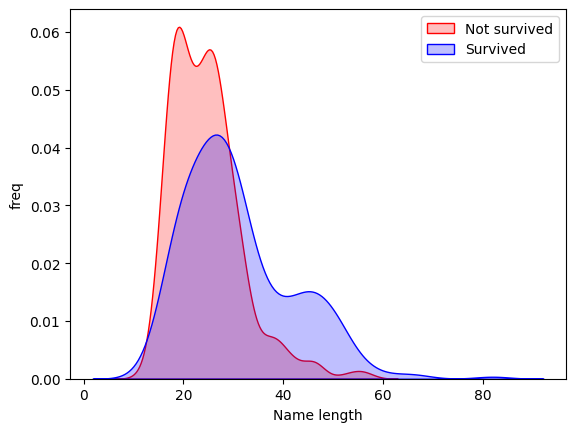

In [35]:
g = sns.kdeplot(
    train_df['Name length'][(train_df['Survived'] == 0) & (train_df['Name length'].notnull())],
    color = 'Red',
    fill = True
)

g = sns.kdeplot(
    train_df['Name length'][(train_df['Survived'] == 1) & (train_df['Name length'].notnull())],
    ax = g,
    color = 'Blue',
    fill = True
)

g.set_xlabel('Name length')
g.set_ylabel('freq')
g = g.legend(['Not survived', 'Survived'])

In [36]:
train_df['Name length GB'] = pd.qcut(train_df['Name length'], 8)
test_df['Name length GB'] = pd.qcut(test_df['Name length'], 8)

In [37]:
train_df.groupby(['Name length GB'], as_index = False)['Survived'].mean()

C:\Users\erfan\AppData\Local\Temp\ipykernel_3600\1086051104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name length GB'], as_index = False)['Survived'].mean()


,Name length GB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [38]:
train_df.loc[train_df['Name length'] <= 18, 'Name length'] = 0 
train_df.loc[(train_df['Name length'] > 18) & (train_df['Name length'] <= 20), 'Name size'] = 1 
train_df.loc[(train_df['Name length'] > 20) & (train_df['Name length'] <= 23), 'Name size'] = 2 
train_df.loc[(train_df['Name length'] > 23) & (train_df['Name length'] <= 25), 'Name size'] = 3
train_df.loc[(train_df['Name length'] > 25) & (train_df['Name length'] <= 27.25), 'Name size'] = 4
train_df.loc[(train_df['Name length'] > 27.25) & (train_df['Name length'] <= 30), 'Name size'] = 5
train_df.loc[(train_df['Name length'] > 30) & (train_df['Name length'] <= 38), 'Name size'] = 6
train_df.loc[(train_df['Name length'] > 38) & (train_df['Name length'] <= 82), 'Name size'] = 7
train_df.loc[train_df['Name length'] > 82, 'Name'] = 8

test_df.loc[test_df['Name length'] <= 18, 'Name size'] = 0 
test_df.loc[(test_df['Name length'] > 18) & (test_df['Name length'] <= 20), 'Name size'] = 1 
test_df.loc[(test_df['Name length'] > 20) & (test_df['Name length'] <= 23), 'Name size'] = 2 
test_df.loc[(test_df['Name length'] > 23) & (test_df['Name length'] <= 25), 'Name size'] = 3
test_df.loc[(test_df['Name length'] > 25) & (test_df['Name length'] <= 27.25), 'Name size'] = 4
test_df.loc[(test_df['Name length'] > 27.25) & (test_df['Name length'] <= 30), 'Name size'] = 5
test_df.loc[(test_df['Name length'] > 30) & (test_df['Name length'] <= 38), 'Name size'] = 6
test_df.loc[(test_df['Name length'] > 38) & (test_df['Name length'] <= 82), 'Name size'] = 7
test_df.loc[test_df['Name length'] > 82, 'Name size'] = 8

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family size group,Age Range,Fare Cut,Title,Name length,Name length GB,Name size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [40]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [41]:
train_df['Ticket_number'] = train_df['Ticket'].apply(lambda x:pd.Series({'Ticket': x.split()[-1]}))
test_df['Ticket_number'] = test_df['Ticket'].apply(lambda x:pd.Series({'Ticket': x.split()[-1]}))

In [42]:
train_df.groupby(['Ticket_number'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,Ticket_number,count,mean
196,2343,7,0.000000
94,1601,7,0.714286
464,347082,7,0.000000
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
674,8475,1,0.000000
675,851,1,0.000000
676,9234,1,1.000000
61,11765,1,1.000000


In [43]:
train_df.groupby('Ticket_number')['Ticket_number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_number, Length: 891, dtype: int64

In [44]:
train_df['TicketNumberCounts'] = train_df.groupby('Ticket_number')['Ticket_number'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('Ticket_number')['Ticket_number'].transform('count')

In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Family size group,Age Range,Fare Cut,Title,Name length,Name length GB,Name size,Ticket_number,TicketNumberCounts
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1


In [46]:
train_df.groupby(['TicketNumberCounts'], as_index = False)['Survived'].agg(['count',
                                                                            'mean']).sort_values('count', ascending = False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [47]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Family size group,Age Range,Fare Cut,Title,Name length,Name length GB,Name size,Ticket_number,TicketNumberCounts
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1


In [48]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin'])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin'])

In [49]:
train_df.groupby(['Cabin'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [50]:
train_df['Cabin_label'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_label'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family size group,Age Range,Fare Cut,Title,Name length,Name length GB,Name size,Ticket_number,TicketNumberCounts,Cabin_label
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,0


In [52]:
train_df.groupby(['Cabin_label'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin_label,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [53]:
train_df.shape

(891, 23)

In [54]:
test_df.shape

(418, 22)

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family_size         891 non-null    int64   
 13  Family size group   891 non-null    object  
 14  Age Range           714 non-null    category
 15  Fare Cut            891 non-null    cate

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 332 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  Family_size         418 non-null    int64   
 12  Family size group   418 non-null    object  
 13  Age Range           332 non-null    category
 14  Fare Cut            417 non-null    category
 15  Title               418 non-null    obje

In [57]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Family size group', 'Age Range', 'Fare Cut', 'Title', 'Name length',
       'Name length GB', 'Name size', 'Ticket_number', 'TicketNumberCounts',
       'Cabin_label'],
      dtype='object')

In [58]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [59]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy = 'most_frequent')

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family_size         891 non-null    int64   
 13  Family size group   891 non-null    object  
 14  Age Range           714 non-null    category
 15  Fare Cut            891 non-null    cate

In [61]:
odecols = ['Family size group']
ohecols = ['Sex', 'Embarked']

In [62]:
X = train_df.drop(['Survived'], axis = 1)
Y = train_df['Survived']

In [63]:
X_test_df = test_df.drop(['Age Range', 'Fare Cut'], axis = 1)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 21)

In [65]:
ordinal_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [66]:
col_tran = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, odecols),
    ('ohe_pipeline', ohe_pipeline, ohecols),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_label', 'Name size', 'Age', 'Fare'])
], remainder='drop', n_jobs=-1)

In [67]:
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5, 10, 15],
    'max_depth': [8, 9, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

pipefinalrfc = make_pipeline(col_tran, CV_rfc)
pipefinalrfc.fit(X_train, Y_train)

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
0.8272727272727274


In [71]:
Y_pred = pipefinalrfc.predict(X_test_df)

In [72]:
final = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

In [74]:
final.to_csv('final.csv', index=False)